In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('C:/Users/Soukaina/OneDrive/Bureau/traffic')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path

'C:\\Users\\Soukaina\\OneDrive\\Bureau\\traffic'

In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [5]:
data = np.array(data)
labels = np.array(labels)

In [6]:
os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

In [7]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [8]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [10]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [11]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

In [12]:
print(y_train.shape,y_test.shape)

(31367, 43) (7842, 43)


In [16]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43,activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
epochs=20
history=model.fit(X_train,y_train,batch_size=32,epochs=epochs,validation_data=(X_test,y_test))

Epoch 1/20
981/981 [==============================] - 50s 51ms/step - loss: 1.8885 - accuracy: 0.5114 - val_loss: 0.4476 - val_accuracy: 0.8961
Epoch 2/20
981/981 [==============================] - 62s 63ms/step - loss: 0.5264 - accuracy: 0.8563 - val_loss: 0.1218 - val_accuracy: 0.9693
Epoch 3/20
981/981 [==============================] - 65s 66ms/step - loss: 0.3548 - accuracy: 0.9077 - val_loss: 0.0985 - val_accuracy: 0.9748
Epoch 4/20
981/981 [==============================] - 62s 64ms/step - loss: 0.2794 - accuracy: 0.9286 - val_loss: 0.1109 - val_accuracy: 0.9704
Epoch 5/20
981/981 [==============================] - 61s 62ms/step - loss: 0.2375 - accuracy: 0.9416 - val_loss: 0.0833 - val_accuracy: 0.9795
Epoch 6/20
981/981 [==============================] - 67s 69ms/step - loss: 0.2018 - accuracy: 0.9503 - val_loss: 0.1259 - val_accuracy: 0.9671
Epoch 7/20
981/981 [==============================] - 62s 64ms/step - loss: 0.2655 - accuracy: 0.9399 - val_loss: 0.0824 - val_accuracy:

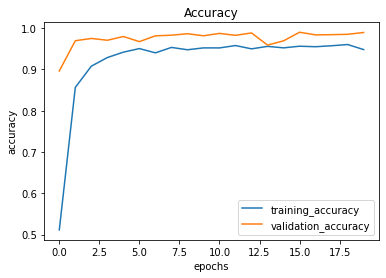

In [20]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training_accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

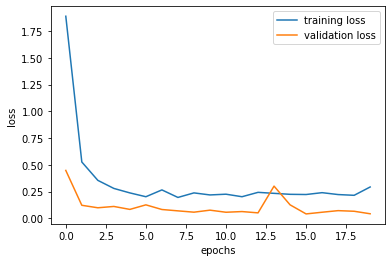

In [22]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [23]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [24]:
X_test, label = testing('Test.csv')

In [31]:
Y_pred = model.predict(X_test)
classes=np.argmax(Y_pred,axis=1)
classes

395/395 [==============================] - 5s 12ms/step


array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label,classes))

0.9565320665083136


In [33]:
model.save("./training/TSR.h5")

In [34]:
import os
os.chdir(r'C:/Users/Soukaina/OneDrive/Bureau/traffic')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [35]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [45]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    classes=np.argmax(Y_pred,axis=1)
    return image,classes

1/1 [==============================] - 0s 24ms/step
Predicted traffic sign is:  Speed limit (60km/h)


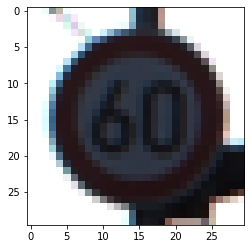

In [47]:
plot,prediction = test_on_img(r'C:\Users\Soukaina\OneDrive\Bureau\traffic\Test\00700.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()